In [1]:
sns.set_style('white')

## 모델 평가 비교
1. `hr_raw.csv` 인코딩만 한 버전
2. `hr_bin.csv` 인코딩 + 범주화까지 한 버전

In [2]:
hr_raw = pd.read_csv('datas/hr_raw.csv', index_col=0)
hr_raw.head()

,Age,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,JobRole_LaboratoryTechnician,JobRole_Manager,JobRole_ManufacturingDirector,JobRole_ResearchDirector,JobRole_ResearchScientist,JobRole_SalesExecutive,JobRole_SalesRepresentative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,2,1,2,2,3,2,4,5993,8,...,0,0,0,0,0,1,0,0,0,1
1,49,1,8,1,3,2,2,2,5130,1,...,0,0,0,0,1,0,0,0,1,0
2,37,2,2,2,4,2,1,3,2090,6,...,1,0,0,0,0,0,0,0,0,1
3,33,1,3,4,4,3,1,3,2909,1,...,0,0,0,0,1,0,0,0,1,0
4,27,2,2,1,1,3,1,2,3468,9,...,1,0,0,0,0,0,0,0,1,0


In [3]:
hr_bin = pd.read_csv('datas/hr_bin.csv', index_col=0)
hr_bin.head()

,Age,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,JobRole_LaboratoryTechnician,JobRole_Manager,JobRole_ManufacturingDirector,JobRole_ResearchDirector,JobRole_ResearchScientist,JobRole_SalesExecutive,JobRole_SalesRepresentative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,4,2,1,2,2,3,2,4,5993,8,...,0,0,0,0,0,1,0,0,0,1
1,4,1,2,1,3,2,2,2,5130,1,...,0,0,0,0,1,0,0,0,1,0
2,3,2,1,2,4,2,1,3,2090,6,...,1,0,0,0,0,0,0,0,0,1
3,3,1,1,4,4,3,1,3,2909,1,...,0,0,0,0,1,0,0,0,1,0
4,2,2,1,1,1,3,1,2,3468,9,...,1,0,0,0,0,0,0,0,1,0


### 1. `hr_raw.csv` 인코딩만 한 버전

In [4]:
X = hr_raw.drop(columns=['MonthlyIncome'])
y = hr_raw.MonthlyIncome

In [5]:
# 훈련용과 테스트용으로 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 40), (294, 40), (1176,), (294,))

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
models.append(('XGBRegressor', XGBRegressor()))
models.append(('LGBMRegressor', LGBMRegressor()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))

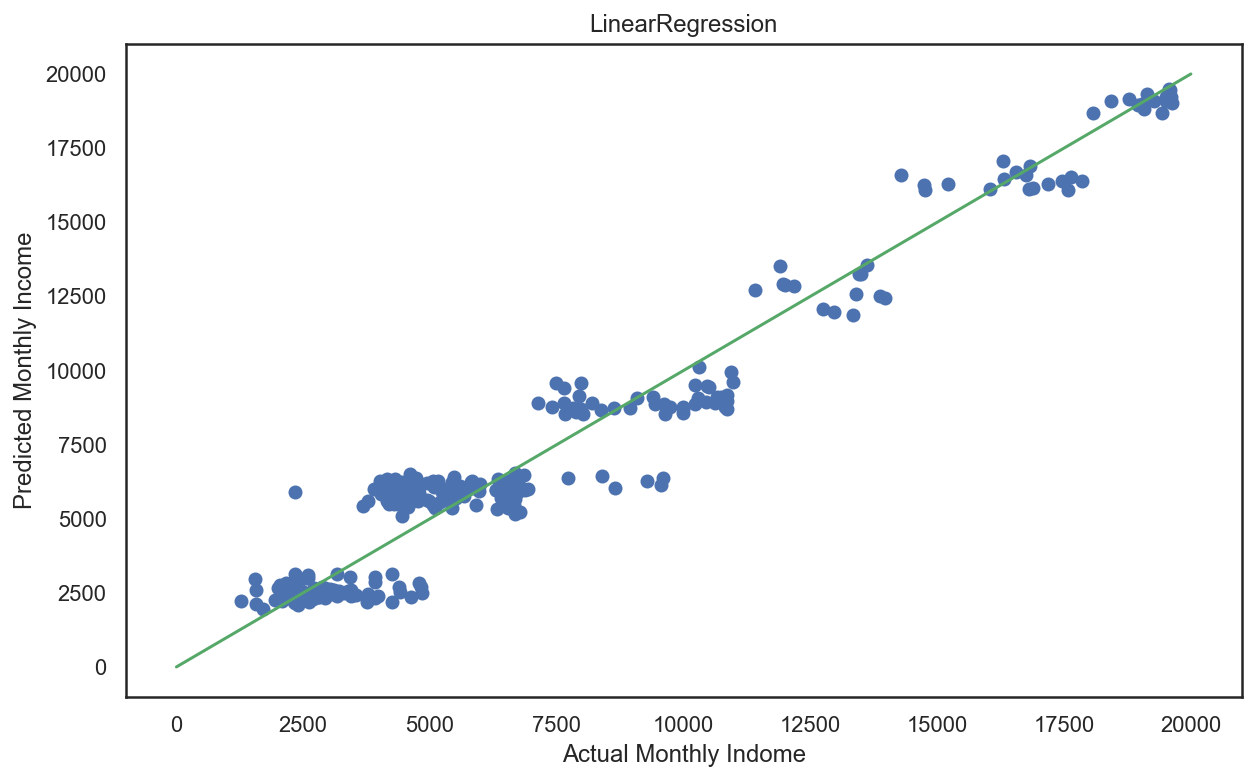

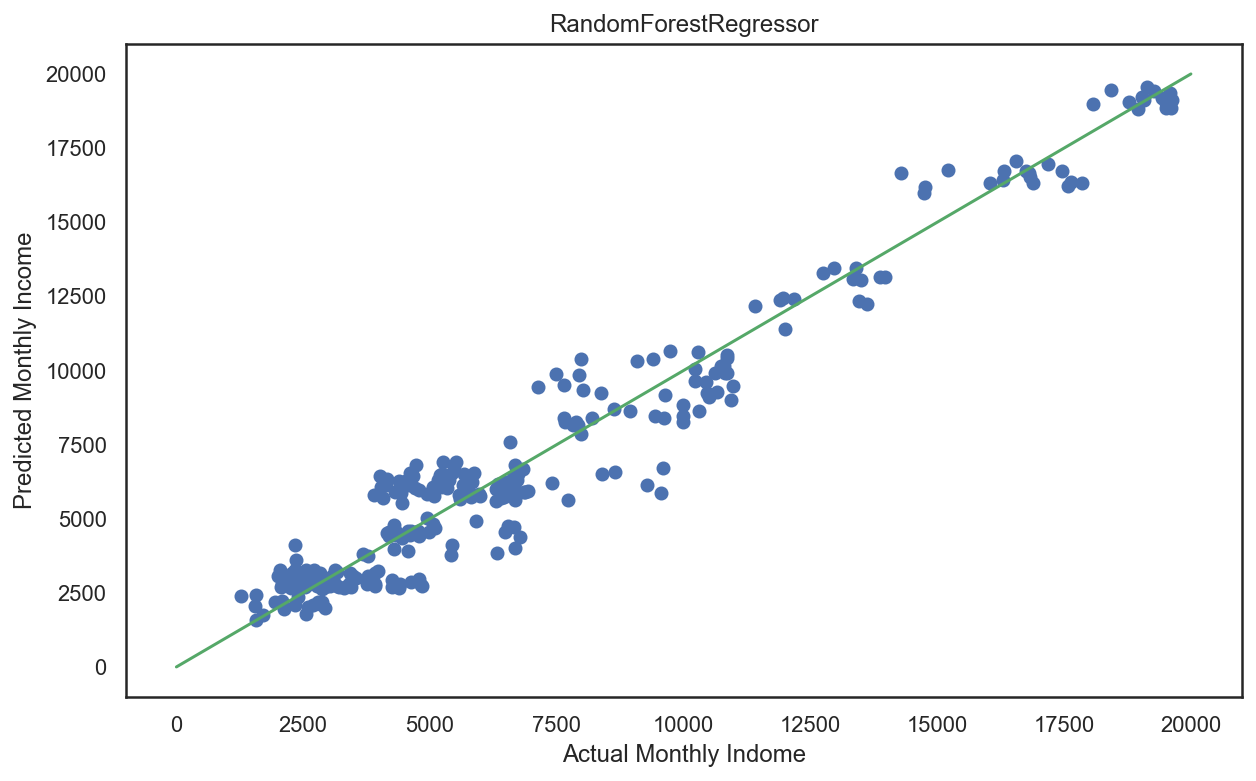

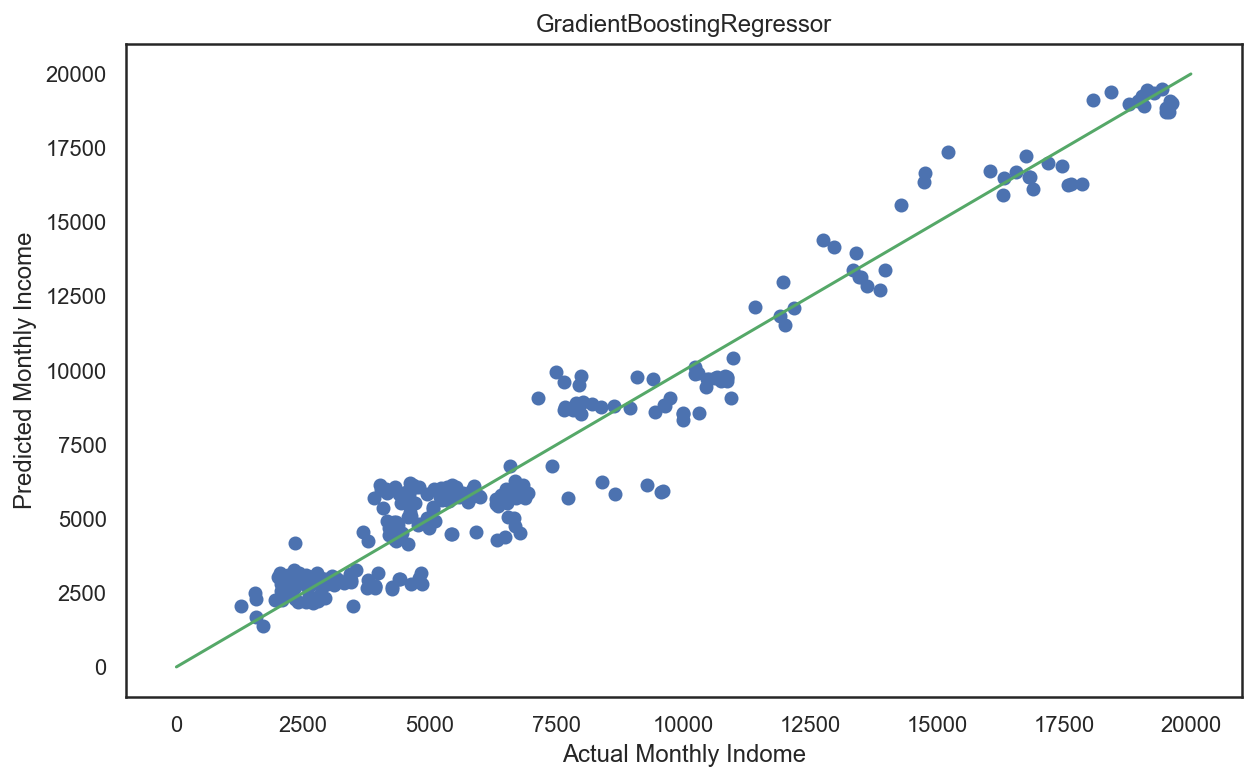

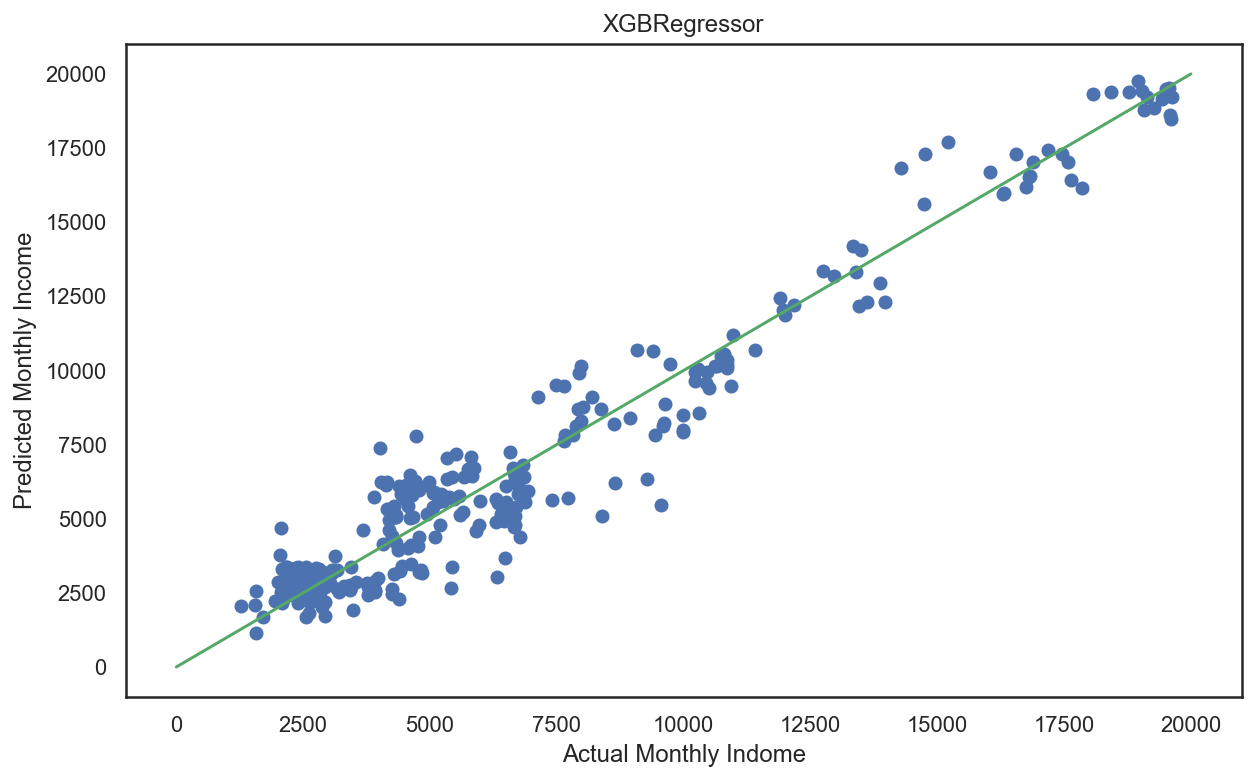

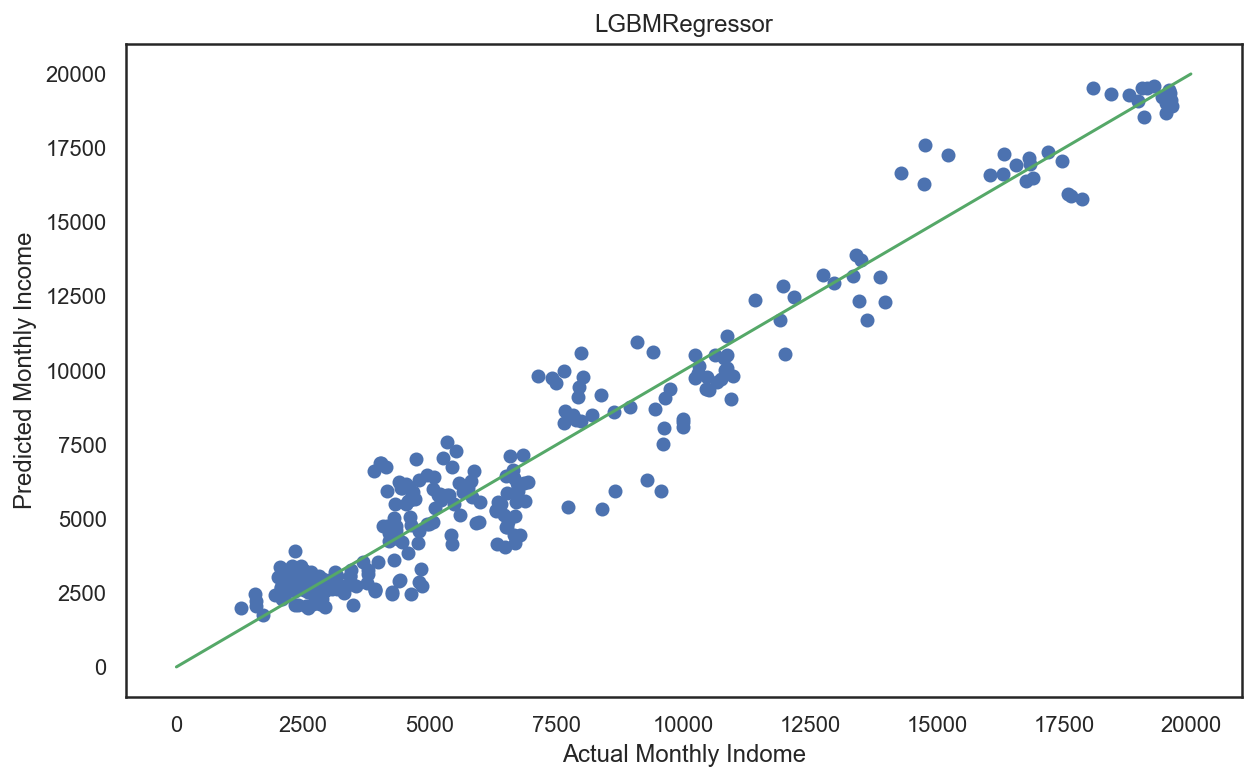

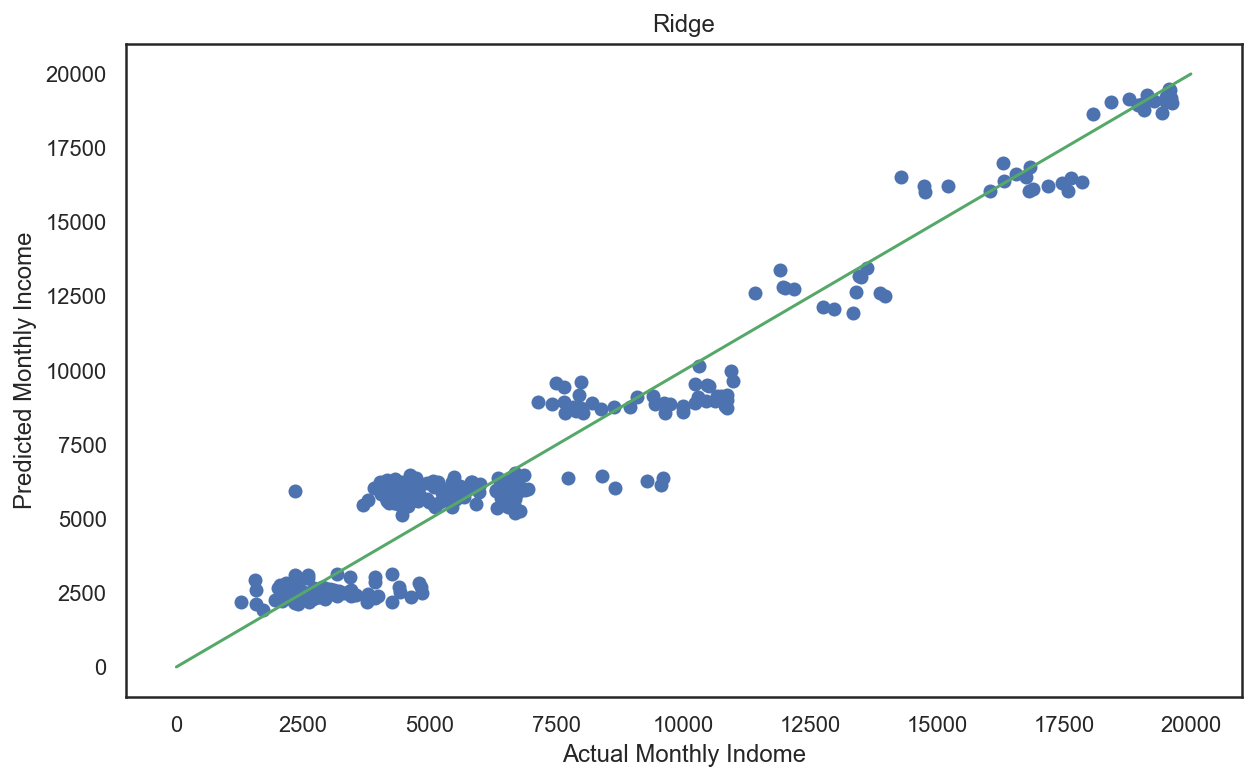

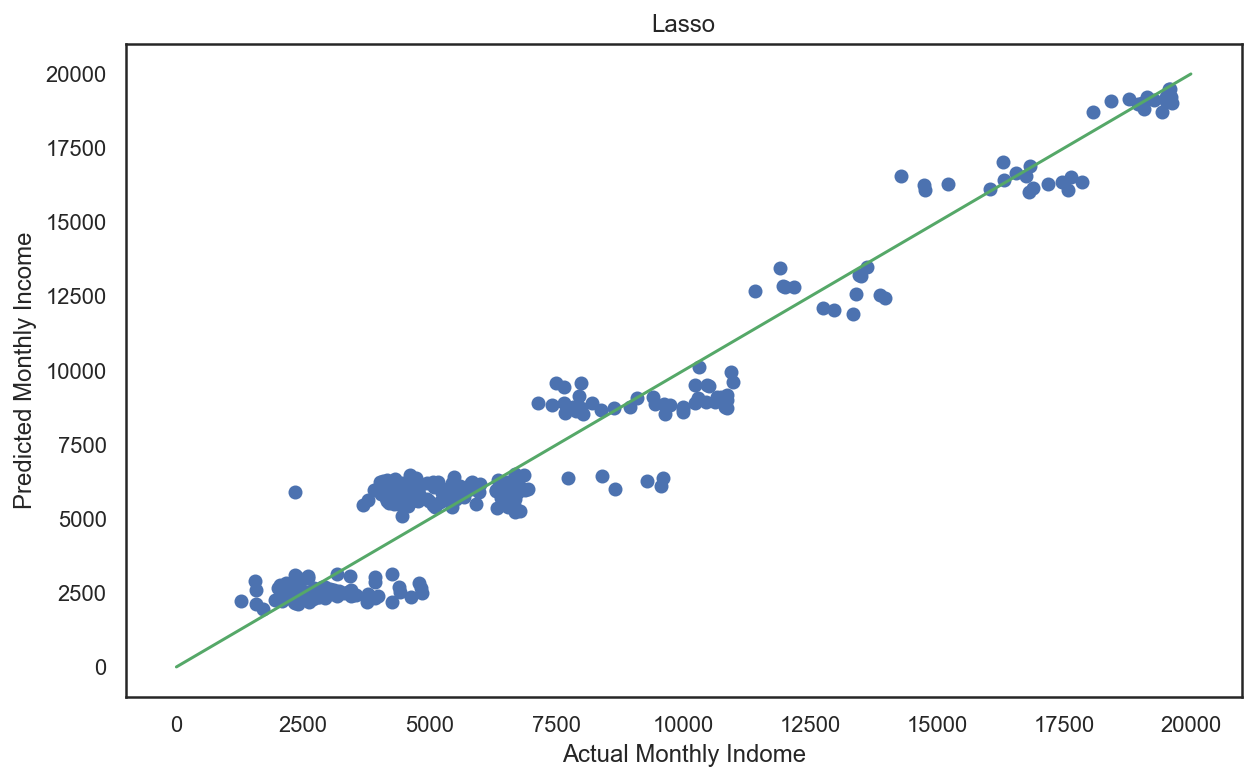

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

names = []
rmse_tr = []
rmse_test = []
mae_tr = []
mae_test = []
r2_tr = []
r2_test = []

for name, model in models:
    model.fit(X_train, y_train)
    pred_tr = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    names.append(name)
    rmse_tr.append((np.sqrt(mean_squared_error(y_train, pred_tr))))
    rmse_test.append((np.sqrt(mean_squared_error(y_test, pred_test))))
    mae_tr.append(mean_absolute_error(y_train, pred_tr))
    mae_test.append(mean_absolute_error(y_test, pred_test))
    r2_tr.append(r2_score(y_train, pred_tr))
    r2_test.append(r2_score(y_test, pred_test))
    
    plt.figure(figsize=(10,6))
    plt.title(name)
    plt.scatter(y_test, pred_test)
    plt.xlabel('Actual Monthly Indome')
    plt.ylabel('Predicted Monthly Income')
    plt.plot([0, 20000], [0, 20000], 'g')
    plt.show()

In [8]:
score_raw = pd.DataFrame({'model name': names,
                      'RMSE train': rmse_tr,
                      'RMSE test': rmse_test,
                      'MAE train': mae_tr,
                      'MAE test': mae_test,
                      'r2 score train': r2_tr,
                      'r2 score test': r2_test})
score_raw

,model name,RMSE train,RMSE test,MAE train,MAE test,r2 score train,r2 score test
0,LinearRegression,1119.925005,1082.834917,849.867484,861.910298,0.942709,0.949133
1,RandomForestRegressor,391.702614,1046.665003,289.319524,811.013095,0.992992,0.952474
2,GradientBoostingRegressor,858.551017,998.943328,640.643543,783.653805,0.966330,0.956709
3,XGBRegressor,54.913047,1126.805216,37.270050,870.392745,0.999862,0.944918
4,LGBMRegressor,437.784912,1134.653435,329.939253,878.680749,0.991245,0.944148
5,Ridge,1120.322867,1079.117768,849.553814,858.843652,0.942668,0.949482
6,Lasso,1120.148419,1080.278924,849.731615,859.399776,0.942686,0.949373


In [9]:
import statsmodels.api as sm

df = pd.concat([X_train, y_train], axis=1)

model_raw = sm.OLS.from_formula("MonthlyIncome ~ " + "+".join(X_train.columns), data=df)
result_raw = model_raw.fit()
result_raw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     520.6
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        08:36:56   Log-Likelihood:                -9925.4
No. Observations:                1176   AIC:                         1.992e+04
Df Residuals:                    1139   BIC:                         2.011e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          608.9292    229.773      2.650      0.008     158.104    1059.754
Age                                 -2.1448      5.294     -0.405      0.685     -12.531       8.241
BusinessTravel                      95.4185     51.031      1.870      0.062      -4.706     195.543
DistanceFromHome                    -3.6537      4.170     -0.876      0.381     -11.836       4.529
Education                          -15.8952     34.293     -0.464      0.643     -83.180      51.390
EnvironmentSatisfaction             -4.0256     31.086     -0.129      0.897     -65.017      56.966
JobInvolvement                    -100.2470     46.533     -2.154      0.031    -191.547      -8.947
JobLevel                          2712.5625     77.001     35.228      0.000    2561.483    2863.642
JobSatisfaction                     -0.3340     30.603     -0.011      0.991     -60.378      59.710
NumCompaniesWorked                   4.8145     15.014      0.321      0.749     -24.643      34.272
OverTime                           101.5490     74.638      1.361      0.174     -44.895     247.993
PercentSalaryHike                   13.9811     14.566      0.960      0.337     -14.598      42.560
PerformanceRating                  -91.8856    148.060     -0.621      0.535    -382.387     198.616
RelationshipSatisfaction            40.8420     31.055      1.315      0.189     -20.090     101.774
StockOptionLevel                   -42.1526     55.131     -0.765      0.445    -150.322      66.016
TotalWorkingYears                   40.8120      9.652      4.228      0.000      21.874      59.750
TrainingTimesLastYear              -31.6034     26.518     -1.192      0.234     -83.633      20.427
WorkLifeBalance                    -27.8027     48.473     -0.574      0.566    -122.909      67.303
YearsAtCompany                      -1.3097     10.817     -0.121      0.904     -22.534      19.914
YearsInCurrentRole                   2.2753     14.576      0.156      0.876     -26.324      30.875
YearsSinceLastPromotion             18.7605     13.678      1.372      0.170      -8.077      45.598
EducationField_HumanResources      185.9867    264.881      0.702      0.483    -333.722     705.696
EducationField_LifeSciences         57.4035     83.444      0.688      0.492    -106.317     221.124
EducationField_Marketing            63.5816    124.481      0.511      0.610    -180.657     307.820
EducationField_Medical              62.5275     87.361      0.716      0.474    -108.879     233.934
EducationField_Other                63.7454    138.179      0.461      0.645    -207.368     334.859
EducationField_TechnicalDegree     175.6844    114.802      1.530      0.126     -49.564     400.933
Gender_Female                      270.7477    120.87

### 2. `hr_bin.csv` 인코딩만 한 버전

In [10]:
X = hr_bin.drop(columns=['MonthlyIncome'])
y = hr_bin.MonthlyIncome

In [11]:
# 훈련용과 테스트용으로 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 40), (294, 40), (1176,), (294,))

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models = []
models.append(('LinearRegression', LinearRegression()))
# models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
models.append(('XGBRegressor', XGBRegressor()))
models.append(('LGBMRegressor', LGBMRegressor()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))

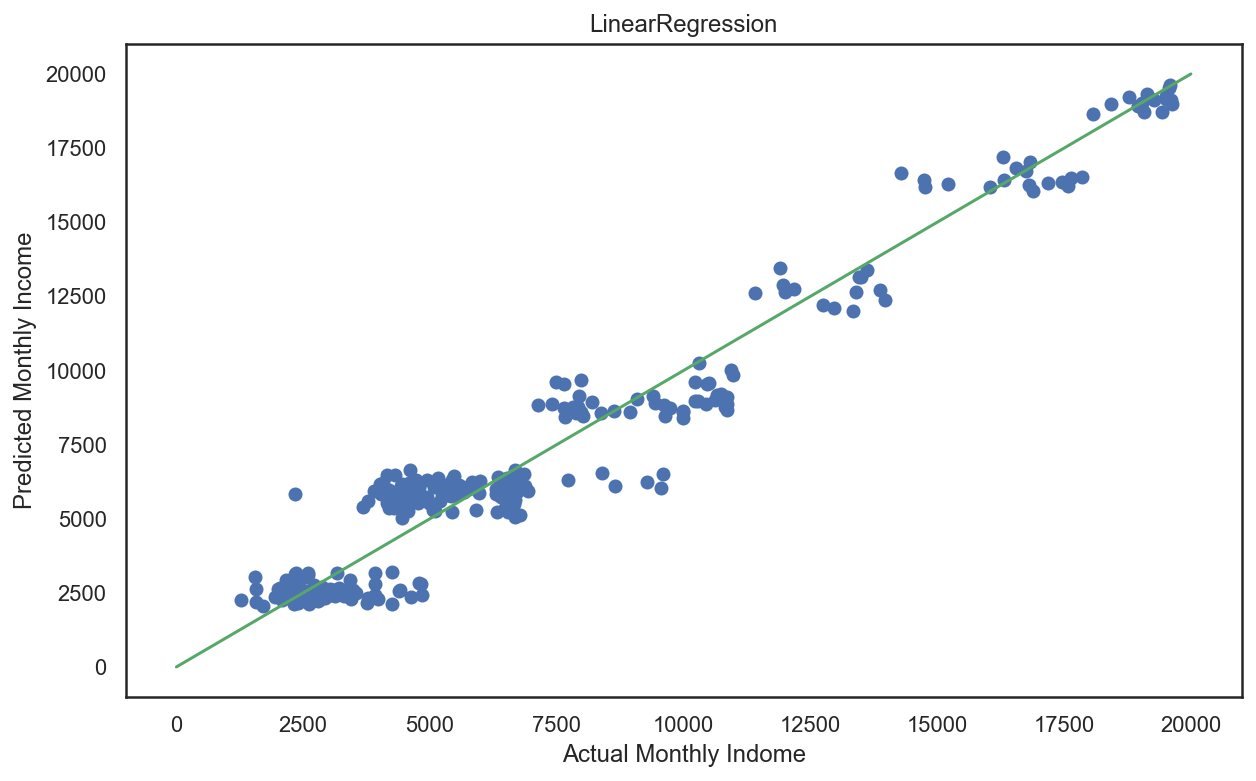

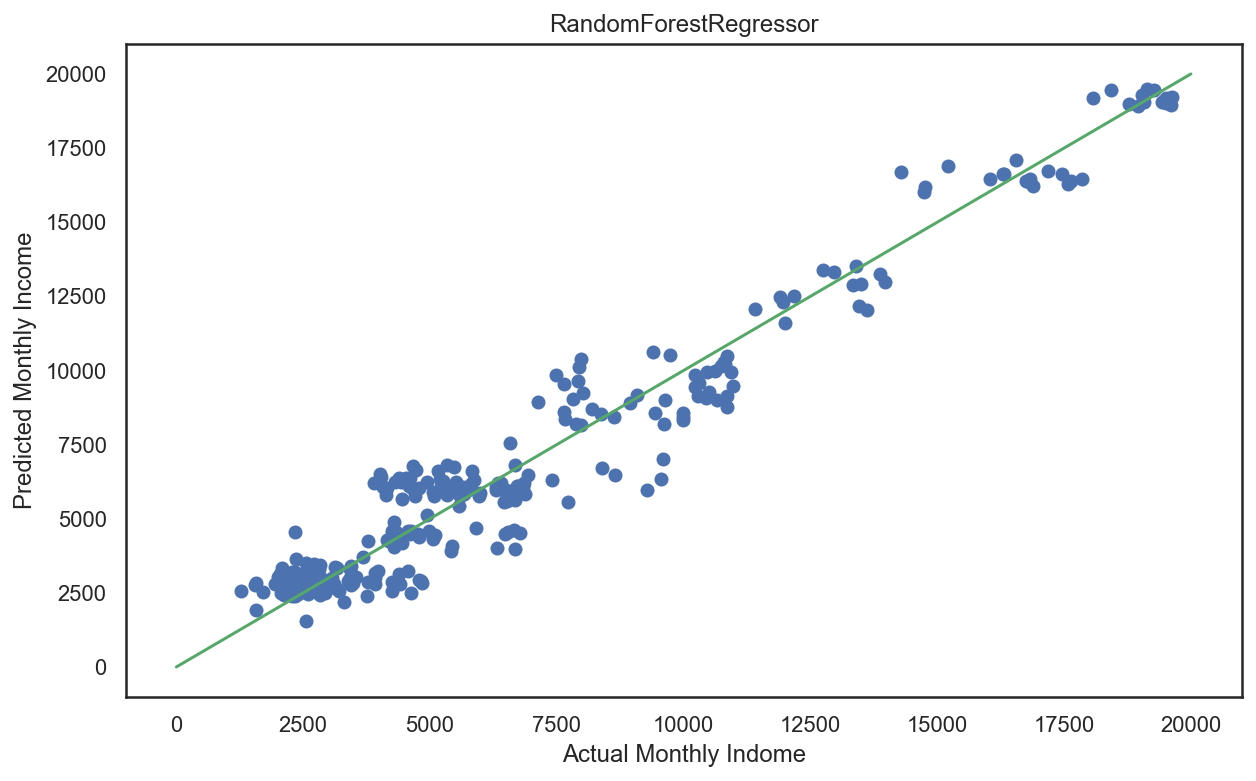

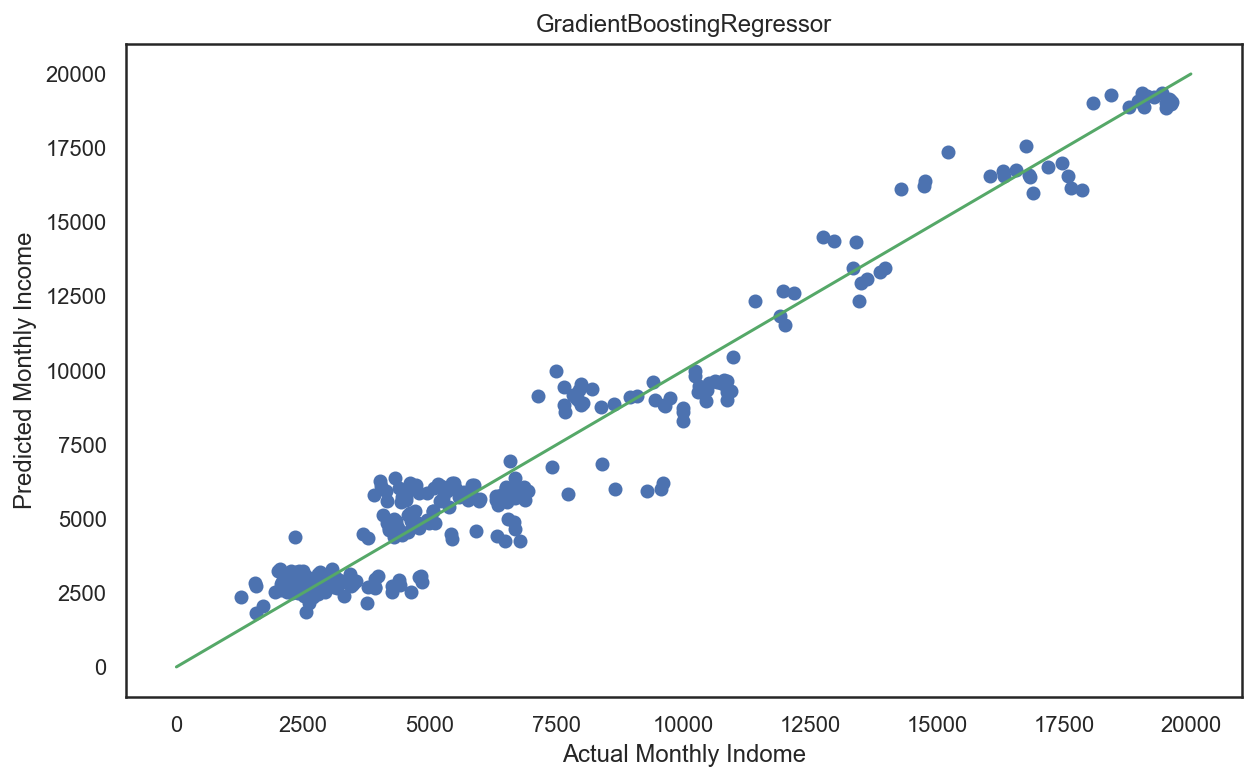

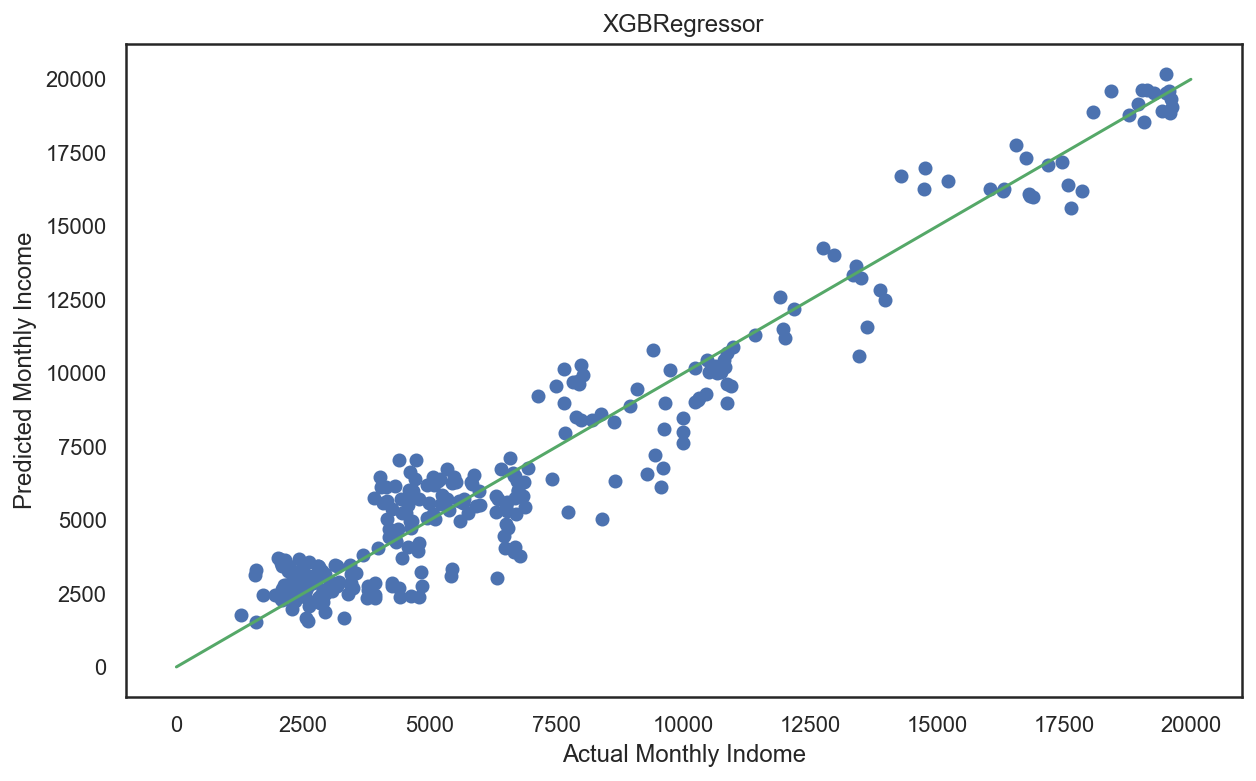

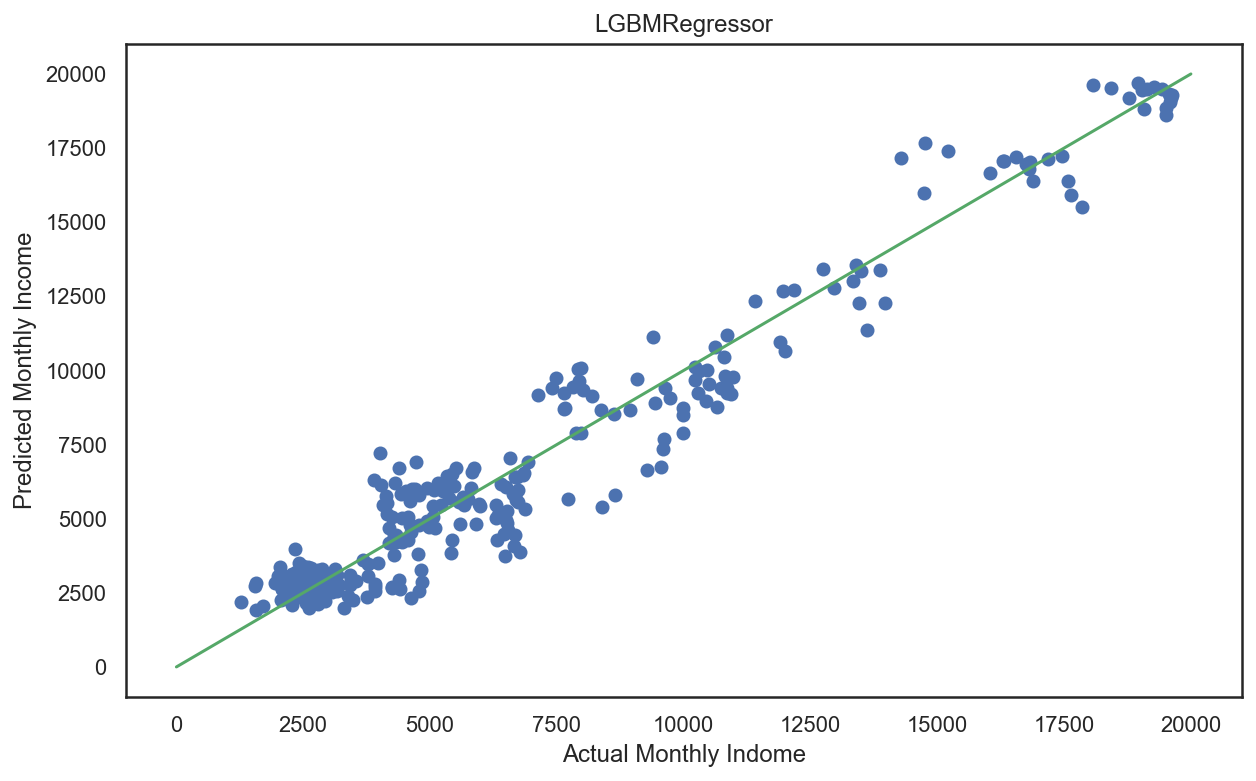

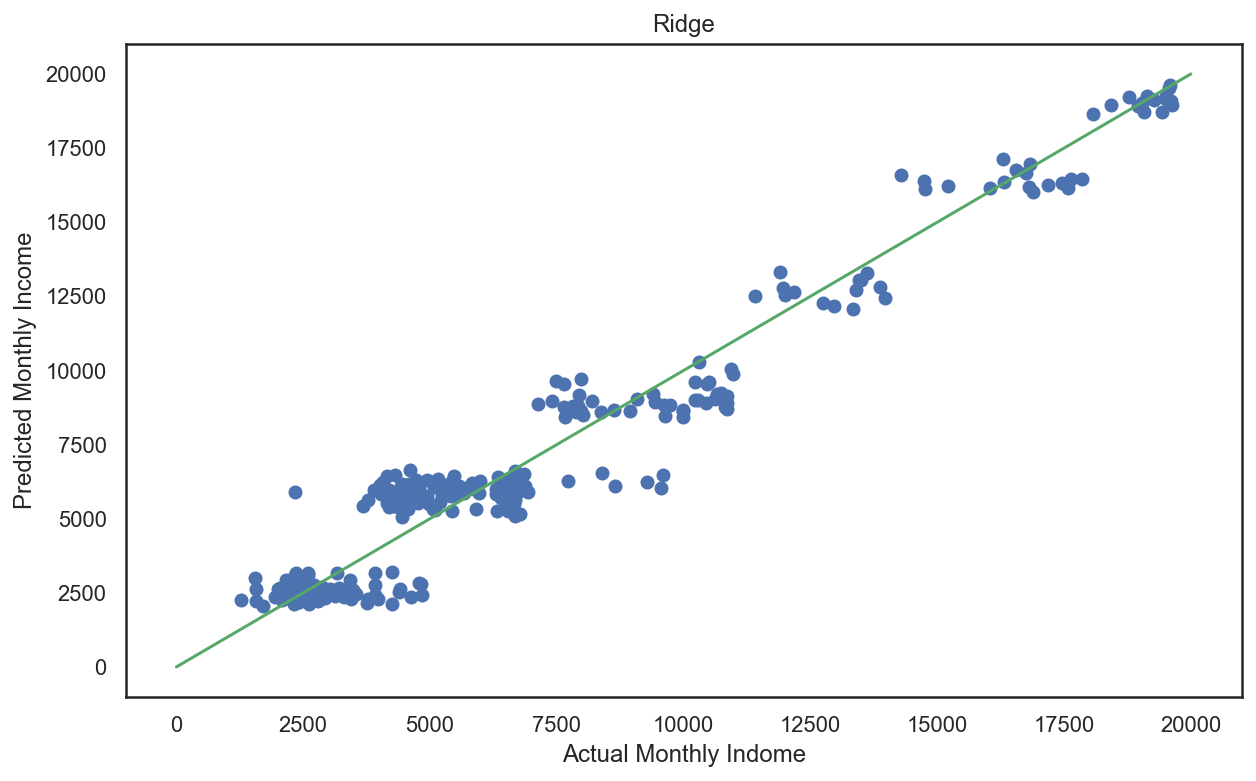

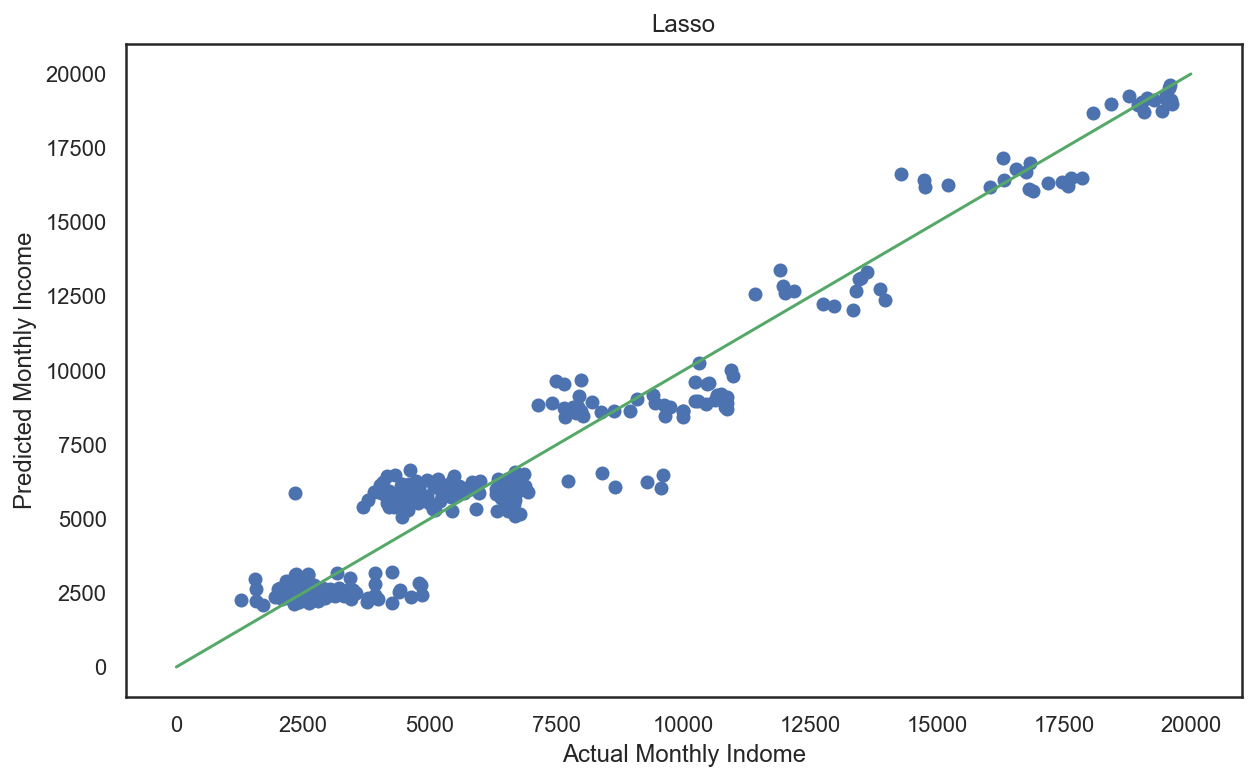

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

names = []
rmse_tr = []
rmse_test = []
mae_tr = []
mae_test = []
r2_tr = []
r2_test = []

for name, model in models:
    model.fit(X_train, y_train)
    pred_tr = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    names.append(name)
    rmse_tr.append((np.sqrt(mean_squared_error(y_train, pred_tr))))
    rmse_test.append((np.sqrt(mean_squared_error(y_test, pred_test))))
    mae_tr.append(mean_absolute_error(y_train, pred_tr))
    mae_test.append(mean_absolute_error(y_test, pred_test))
    r2_tr.append(r2_score(y_train, pred_tr))
    r2_test.append(r2_score(y_test, pred_test))
    
    plt.figure(figsize=(10,6))
    plt.title(name)
    plt.scatter(y_test, pred_test)
    plt.xlabel('Actual Monthly Indome')
    plt.ylabel('Predicted Monthly Income')
    plt.plot([0, 20000], [0, 20000], 'g')
    plt.show()

In [14]:
score_bin = pd.DataFrame({'model name': names,
                      'RMSE train': rmse_tr,
                      'RMSE test': rmse_test,
                      'MAE train': mae_tr,
                      'MAE test': mae_test,
                      'r2 score train': r2_tr,
                      'r2 score test': r2_test})
score_bin

,model name,RMSE train,RMSE test,MAE train,MAE test,r2 score train,r2 score test
0,LinearRegression,1112.918704,1081.253925,844.089158,857.862360,0.943423,0.949281
1,RandomForestRegressor,393.846666,1067.291905,289.824481,837.160238,0.992915,0.950583
2,GradientBoostingRegressor,886.313353,1018.246965,662.072094,801.444815,0.964117,0.955020
3,XGBRegressor,68.499059,1175.634481,43.737832,903.874204,0.999786,0.940041
4,LGBMRegressor,481.286636,1127.251357,366.451985,873.523705,0.989419,0.944874
5,Ridge,1113.321399,1077.611224,843.328407,854.568374,0.943382,0.949622
6,Lasso,1113.160085,1078.121598,843.674759,855.023135,0.943399,0.949575


In [15]:
import statsmodels.api as sm

df = pd.concat([X_train, y_train], axis=1)

model_bin = sm.OLS.from_formula("MonthlyIncome ~ " + "+".join(X_train.columns), data=df)
result_bin = model_bin.fit()
result_bin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     527.6
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        08:37:05   Log-Likelihood:                -9918.0
No. Observations:                1176   AIC:                         1.991e+04
Df Residuals:                    1139   BIC:                         2.010e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          558.8345    223.770      2.497      0.013     119.787     997.882
Age                                 -4.5684     46.927     -0.097      0.922     -96.642      87.505
BusinessTravel                      94.2904     50.712      1.859      0.063      -5.209     193.790
DistanceFromHome                   -21.8513     21.564     -1.013      0.311     -64.161      20.459
Education                          -18.0277     34.101     -0.529      0.597     -84.936      48.881
EnvironmentSatisfaction             -6.6334     30.869     -0.215      0.830     -67.201      53.934
JobInvolvement                     -99.6971     46.256     -2.155      0.031    -190.453      -8.941
JobLevel                          2670.0266     75.672     35.284      0.000    2521.554    2818.499
JobSatisfaction                      0.1974     30.407      0.006      0.995     -59.462      59.857
NumCompaniesWorked                   0.8444     14.715      0.057      0.954     -28.028      29.716
OverTime                            95.1512     74.158      1.283      0.200     -50.350     240.652
PercentSalaryHike                   14.4355     14.471      0.998      0.319     -13.957      42.828
PerformanceRating                  -97.5014    147.047     -0.663      0.507    -386.016     191.013
RelationshipSatisfaction            39.6554     30.864      1.285      0.199     -20.901     100.212
StockOptionLevel                   -32.2386     54.868     -0.588      0.557    -139.893      75.416
TotalWorkingYears                  238.8028     43.629      5.473      0.000     153.200     324.405
TrainingTimesLastYear              -31.4273     26.381     -1.191      0.234     -83.188      20.333
WorkLifeBalance                    -22.8818     48.311     -0.474      0.636    -117.670      71.906
YearsAtCompany                       0.9254     50.719      0.018      0.985     -98.588     100.439
YearsInCurrentRole                  -4.7012     42.246     -0.111      0.911     -87.589      78.187
YearsSinceLastPromotion             18.4100     13.528      1.361      0.174      -8.132      44.952
EducationField_HumanResources      202.9045    263.283      0.771      0.441    -313.669     719.478
EducationField_LifeSciences         40.8832     82.328      0.497      0.620    -120.648     202.415
EducationField_Marketing            38.3120    123.662      0.310      0.757    -204.319     280.943
EducationField_Medical              45.0689     86.362      0.522      0.602    -124.377     214.514
EducationField_Other                70.3855    137.177      0.513      0.608    -198.763     339.534
EducationField_TechnicalDegree     161.2803    113.662      1.419      0.156     -61.729     384.290
Gender_Female                      245.3704    117.91

In [16]:
result_raw.aic, result_bin.aic

(19924.775419153026, 19910.01498290192)

AIC는 작을수록 좋다.\
범주화한 버전이 아주 살짝 낮다..

In [17]:
# 인코딩
score_raw

,model name,RMSE train,RMSE test,MAE train,MAE test,r2 score train,r2 score test
0,LinearRegression,1119.925005,1082.834917,849.867484,861.910298,0.942709,0.949133
1,RandomForestRegressor,391.702614,1046.665003,289.319524,811.013095,0.992992,0.952474
2,GradientBoostingRegressor,858.551017,998.943328,640.643543,783.653805,0.966330,0.956709
3,XGBRegressor,54.913047,1126.805216,37.270050,870.392745,0.999862,0.944918
4,LGBMRegressor,437.784912,1134.653435,329.939253,878.680749,0.991245,0.944148
5,Ridge,1120.322867,1079.117768,849.553814,858.843652,0.942668,0.949482
6,Lasso,1120.148419,1080.278924,849.731615,859.399776,0.942686,0.949373


In [18]:
# 인코딩 + 범주화
score_bin

,model name,RMSE train,RMSE test,MAE train,MAE test,r2 score train,r2 score test
0,LinearRegression,1112.918704,1081.253925,844.089158,857.862360,0.943423,0.949281
1,RandomForestRegressor,393.846666,1067.291905,289.824481,837.160238,0.992915,0.950583
2,GradientBoostingRegressor,886.313353,1018.246965,662.072094,801.444815,0.964117,0.955020
3,XGBRegressor,68.499059,1175.634481,43.737832,903.874204,0.999786,0.940041
4,LGBMRegressor,481.286636,1127.251357,366.451985,873.523705,0.989419,0.944874
5,Ridge,1113.321399,1077.611224,843.328407,854.568374,0.943382,0.949622
6,Lasso,1113.160085,1078.121598,843.674759,855.023135,0.943399,0.949575


- RMSE (Root Mean Square Error)
    - 표준편차를 일반화시킨 척도로서 실제값과 추정값과의 차이가 얼마인가를 알려주는데 많이 사용되는 척도
- MAE (Mean Absolute Error)
    - 모든 절대 오차의 평균
- R2 (결정계수)
    - 회귀식의 설명력 : 독립변수가 종속변수를 얼마나 잘 설명하고 있는지를 의미
    


- RMSE와 MAE의 결과값은 작을수록 모델의 성능이 더 좋다고 평가할 수 있다.
- R2의 결과값은 1에 가까울수록 모델의 성능이 더 좋다고 평가할 수 있다.

### 범주화 여부에 따른 차이가 별로 없다....😂